In [1]:
from matplotlib.pyplot import figure
from scipy import stats
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pingouin as pg
import scipy.io
import seaborn as sns

# Preprocessing

Please contact the corresponding author, Sungshin Kim (sungshinkim@hanyang.ac.kr), or the first author, Junghyun Kim (juhng62@gmail.com) to get raw data.

In [2]:
dir_index = './../index'
# dir_behav = './../raw_data/behav_data'

In [3]:
# subj_list = ['03','04','05','06','07',
#              '08','09','10','11','12',
#              '14','15','16','17','18',
#              '19','20','21','22','24',
#              '25','26','27','29']

In [4]:
# sigma_1 = 0.682689492137
# sigma_2 = 0.954499736104
# sigma_3 = 0.997300203937
# sec_per_trial = 4  ## time spend(second) in each trial
# ntrial = 12 ## the number of trials per block
# nblock = 12 ## the number of blocks per RUN
# nblocks_main = nblock*4 # total number of blocks = 12 blocks/run * 4 runs
# nblocks_test = nblock*2 # total number of blocks = 12 blocks/run * 4 runs

In [5]:
# def convert_ID(ID):
#     ##################   ##################
#     #  1  2  3  4  5 #   #        2       #
#     #  6  7  8  9 10 #   #        1       #
#     # 11 12 13 14 15 # = # -2 -1  0  1  2 #
#     # 16 17 18 19 20 #   #       -1       #
#     # 21 22 23 24 25 #   #       -2       #
#     ##################   ##################
#     x = np.kron(np.ones(5),np.arange(-2,3)).astype(int)
#     y = np.kron(np.arange(2,-3,-1),np.ones(5)).astype(int)
#     pos = np.array((x[ID-1],y[ID-1]))
#     return pos

In [6]:
# def calc_mrew(behav_datum):
#     datum = scipy.io.loadmat(behav_datum)
#     nS = int(datum['nSampleTrial'][0][0])    # 4 s * 60 Hz = 240 samples
#     tpr = int(datum['nTrialperRun'][0][0])   # 1 + 12 trials/block * 12 blocks
#     nrun = int(datum['nRun'][0][0])

#     temp = datum['LearnTrialStartTime'][0]
#     idx_editpoint = [i+1 for i,t in enumerate(temp[:-2]) if (temp[i]>temp[i+1])]

#     ## counting how many times did they hit the target
#     cnt_hit_all = np.zeros((tpr*nrun,nS), dtype=bool)
#     for t,ID in enumerate(datum['targetID'][0][idx_editpoint[0]:]):
#         pos = datum['boxSize']*convert_ID(ID)
#         xy = datum['allXY'][:,nS*t:nS*(t+1)] # allXY.shape = (2, 60 Hz * 4 s/trial * 145 trials/run * 6 runs = 208800 frames)
#         err = xy - np.ones((2,nS))*pos.T     # err.shape = (2, nS)
#         cnt_hit_all[t,:] = (abs(err[0,:]) <= datum['boxSize']*0.5) & (abs(err[1,:]) <= datum['boxSize']*0.5)
        
#         disp = datum['allData'][:,nS*t:nS*(t+1)] # allData.shape = (14, 208800)

#     rew_bin = np.zeros((nrun,sec_per_trial*tpr))
#     for r in range(nrun):
#         temp = cnt_hit_all[tpr*r:tpr*(r+1),:].reshape(nS*tpr,1)
#         for i in range(sec_per_trial*tpr):
#             rew_bin[r,i] = sum(temp[60*i:60*(i+1)])

#     max_score =  nS*ntrial   ## total frames in a block
#     temp = rew_bin[:,sec_per_trial:].reshape(nrun*sec_per_trial*ntrial*nblock)
#     norm_mrew = np.zeros(nblock*nrun)
#     for i in range(nblock*nrun):
#         norm_mrew[i] = sum(temp[sec_per_trial*ntrial*i:sec_per_trial*ntrial*(i+1)])/max_score

#     return norm_mrew, cnt_hit_all

In [7]:
# rew = {}
# for nn in tqdm(subj_list):
#     subj = 'GL' + nn
#     behav_datum = dir_behav + '/%s-fmri.mat' %subj
#     rew[subj], _ = calc_mrew(behav_datum)
    
# df = pd.DataFrame.from_dict(rew, orient='index', dtype=float)

In [8]:
# df_long = pd.melt(
#     df.reset_index()
#     , id_vars=['index']
#     , var_name='block', value_name='success_rate'
# )
# df_long['condition'] = ['FB' if (block<nblocks_main)&(block%2==0) else ('nFB' if (block<nblocks_main)&(block%2==1) else 'Test') for block in df_long.block]
# df_long['run'] = [block//nblock + 1 for block in df_long.block]
# df_long['stage'] = ['early' if run in [1,2] else ('late' if run in [3,4,5,6] else 'invalid') for run in df_long.run]
# df_long.rename(columns = {'index':'subj'}, inplace = True)
# df_long

In [9]:
# df_long.to_csv('../data/behav.csv', index=False)

In [10]:
df = pd.read_csv('./../data/behav.csv')
df

,subj,block,success_rate,condition,run,stage
0,GL03,0,0.076389,FB,1,early
1,GL04,0,0.287153,FB,1,early
2,GL05,0,0.092708,FB,1,early
3,GL06,0,0.029167,FB,1,early
4,GL07,0,0.128819,FB,1,early
...,...,...,...,...,...,...
1723,GL24,71,0.513889,Test,6,late
1724,GL25,71,0.684375,Test,6,late
1725,GL26,71,0.362153,Test,6,late
1726,GL27,71,0.682639,Test,6,late


# Figure 1 B

In [11]:
df_fig1B = df[df.condition!='Test']
df_fig1B

,subj,block,success_rate,condition,run,stage
0,GL03,0,0.076389,FB,1,early
1,GL04,0,0.287153,FB,1,early
2,GL05,0,0.092708,FB,1,early
3,GL06,0,0.029167,FB,1,early
4,GL07,0,0.128819,FB,1,early
...,...,...,...,...,...,...
1147,GL24,47,0.056944,nFB,4,late
1148,GL25,47,0.217708,nFB,4,late
1149,GL26,47,0.190625,nFB,4,late
1150,GL27,47,0.076042,nFB,4,late


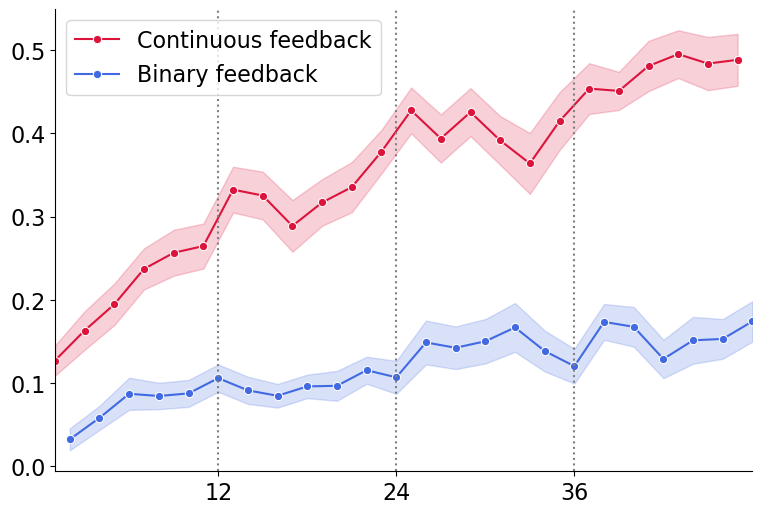

In [12]:
plt.figure(figsize=(9,6))

minor = [0, 11, 23, 35, 47]
# major = [0.5*(minor[i+1]+minor[i]) for i in range(len(minor)-1)]
# major = [5, 11, 17, 23, 29, 35, 41]
major = [11, 23, 35]

ax = sns.lineplot(
    data=df_fig1B, x='block', y='success_rate', hue='condition', style='condition', 
    err_style='band', errorbar=("se", 1), 
    marker='o', dashes=False, palette=['crimson', 'royalblue']
)

ax.set(xlim=(0,47))
ax.set_xlabel(None)
# ax.set_xticks(minor[:4], minor=True)
ax.set_xticks(major, minor=False)
# ax.set_xticklabels(['1', '2', '3', '4'], minor=False)
# ax.set_xticklabels(['6', '12', '18', '24', '30', '36', '42'], minor=False)
ax.set_xticklabels(['12', '24', '36'], minor=False)
# ax.grid(axis='y')
ax.grid(axis='x', which='minor')
for text, new in zip(ax.legend(fontsize=16).texts, ['Continuous feedback', 'Binary feedback']):
    text.set_text(new)
# ax.set_ylabel('Success Rate', fontsize=18)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.axvline(x=11, color='gray', linestyle='dotted')
plt.axvline(x=23, color='gray', linestyle='dotted')
plt.axvline(x=35, color='gray', linestyle='dotted')

# fname = '../figures/fig1B_CFBF.png'
# plt.savefig(fname, dpi=600)
# plt.close()

## With individual data points

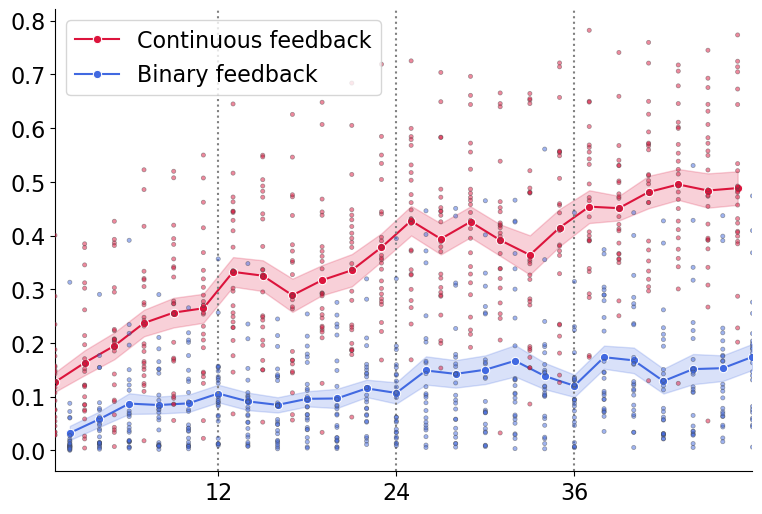

In [13]:
plt.figure(figsize=(9,6))

minor = [0, 11, 23, 35, 47]
# major = [0.5*(minor[i+1]+minor[i]) for i in range(len(minor)-1)]
# major = [5, 11, 17, 23, 29, 35, 41]
major = [11, 23, 35]

ax = sns.lineplot(
    data=df_fig1B, x='block', y='success_rate', hue='condition', style='condition', 
    err_style='band', errorbar=("se", 1), 
    marker='o', dashes=False, palette=['crimson', 'royalblue']
)

# sns.scatterplot(
#     data=df_fig1B, x='block', y='success_rate', hue='condition', style='condition',
#     markers=['s', 's'], palette=['crimson', 'royalblue'], 
#     alpha=0.5,  # transparency
#     s=7,  # size
#     legend=False
# )

sns.stripplot(
    data=df_fig1B, x='block', y='success_rate', hue='condition', 
    dodge=False, palette=['crimson', 'royalblue'],
    size=3, 
    jitter=False, 
    alpha=0.5, 
    marker='o', 
    edgecolor='auto', 
    linewidth=0.5, 
    ax=ax, legend=False
)

ax.set(xlim=(0,47))
ax.set_xlabel(None)
# ax.set_xticks(minor[:4], minor=True)
ax.set_xticks(major, minor=False)
# ax.set_xticklabels(['1', '2', '3', '4'], minor=False)
# ax.set_xticklabels(['6', '12', '18', '24', '30', '36', '42'], minor=False)
ax.set_xticklabels(['12', '24', '36'], minor=False)
# ax.grid(axis='y')
ax.grid(axis='x', which='minor')
for text, new in zip(ax.legend(fontsize=16).texts, ['Continuous feedback', 'Binary feedback']):
    text.set_text(new)
# ax.set_ylabel('Success Rate', fontsize=18)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.axvline(x=11, color='gray', linestyle='dotted')
plt.axvline(x=23, color='gray', linestyle='dotted')
plt.axvline(x=35, color='gray', linestyle='dotted')

# fname = '../figures/fig1B.png'
# plt.savefig(fname, dpi=600)
# plt.close()

# Figure 1 C

In [14]:
df_fig1C = df[df.condition!='Test']
df_fig1C = df_fig1C[df_fig1C['run'].isin([1, 4])]
# df_fig1C

In [15]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # change the bar width
        patch.set_width(new_value)

        # recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [16]:
def annot_stat(star, x1, x2, y, h, col='k', ax=None):
    '''
    https://stackoverflow.com/questions/65557702/adding-statistical-significance-annotations-to-barplot-subplots
    '''
    ax = plt.gca() if ax is None else ax
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color=col)

In [17]:
def annot_stat_2(star, x1, x2, y1, y2, h, col='k', ax=None):
    '''
    https://stackoverflow.com/questions/65557702/adding-statistical-significance-annotations-to-barplot-subplots
    '''
    ax = plt.gca() if ax is None else ax
    ax.plot([x1, x1, x2, x2], [y1, y1+h, y1+h, y2], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y1+h, star, ha='center', va='bottom', color=col)

## Graph

In [18]:
df_fig1C['cond_run'] = ['%s_%s'%(c,r) for c, r in zip(df_fig1C.condition, df_fig1C.run)]
df_fig1C

,subj,block,success_rate,condition,run,stage,cond_run
0,GL03,0,0.076389,FB,1,early,FB_1
1,GL04,0,0.287153,FB,1,early,FB_1
2,GL05,0,0.092708,FB,1,early,FB_1
3,GL06,0,0.029167,FB,1,early,FB_1
4,GL07,0,0.128819,FB,1,early,FB_1
...,...,...,...,...,...,...,...
1147,GL24,47,0.056944,nFB,4,late,nFB_4
1148,GL25,47,0.217708,nFB,4,late,nFB_4
1149,GL26,47,0.190625,nFB,4,late,nFB_4
1150,GL27,47,0.076042,nFB,4,late,nFB_4


/var/folders/l1/61gdrx_s0_5gngjqvkdsfs7h0000gn/T/ipykernel_30298/54413989.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['first', 'last', 'first', 'last'])


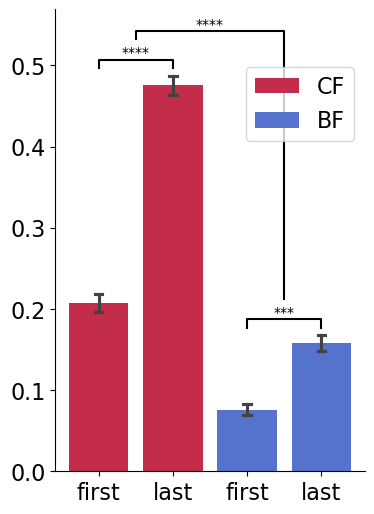

In [19]:
plt.figure(figsize=(4,6))

ax = sns.barplot(
    data=df_fig1C, 
    x='cond_run', y='success_rate', hue='condition', order=['FB_1','FB_4','nFB_1','nFB_4'], 
    errorbar=("se", 1), capsize=0.1, dodge=False, 
    palette=['crimson', 'royalblue']
)

for text, new in zip(ax.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1, 0.9)).texts, ['CF', 'BF']):
    text.set_text(new)


# ax.set_xlabel('Run', fontsize=18)
# ax.set_ylabel('Success Rate', fontsize=18)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels(['first', 'last', 'first', 'last'])
ax.tick_params(axis='both', labelsize=16)

# change_width(ax, .8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# statistical annotation
annot_stat('****', 0, 1, 0.497, 0.01) # between FB conditions
annot_stat('***', 2, 3, 0.177, 0.01) # between nFB conditions
annot_stat_2('****', 0.5, 2.5, 0.532, 0.212, 0.01)

# fname = '../figures/fig1C.png'
# plt.savefig(fname, dpi=600)
# plt.close()

### With individual data points

/var/folders/l1/61gdrx_s0_5gngjqvkdsfs7h0000gn/T/ipykernel_30298/1984870121.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['first', 'last', 'first', 'last'])


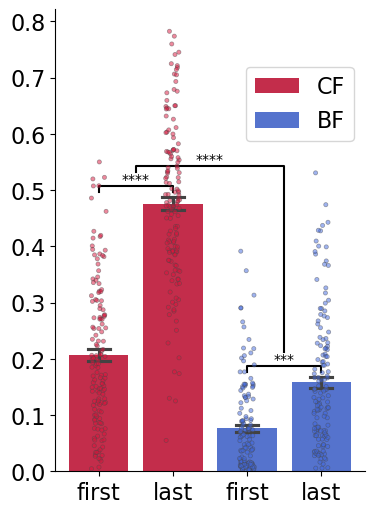

In [29]:
plt.figure(figsize=(4,6))

ax = sns.barplot(
    data=df_fig1C, 
    x='cond_run', y='success_rate', hue='condition', order=['FB_1','FB_4','nFB_1','nFB_4'], 
    errorbar=("se", 1), capsize=0.3, dodge=False, 
    palette=['crimson', 'royalblue']
)

sns.stripplot(
    data=df_fig1C, x='cond_run', y='success_rate', hue='condition', order=['FB_1', 'FB_4', 'nFB_1', 'nFB_4'],
    dodge=False, palette=['crimson', 'royalblue'],
    size=3, 
    jitter=True, 
    alpha=0.5, 
    marker='o', 
    edgecolor='auto', 
    linewidth=0.5, 
    ax=ax, legend=False
)

for text, new in zip(ax.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1, 0.9)).texts, ['CF', 'BF']):
    text.set_text(new)

# ax.set_xlabel('Run', fontsize=18)
# ax.set_ylabel('Success Rate', fontsize=18)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels(['first', 'last', 'first', 'last'])
ax.tick_params(axis='both', labelsize=16)

# change_width(ax, .8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# statistical annotation
annot_stat('****', 0, 1, 0.497, 0.01) # between FB conditions
annot_stat('***', 2, 3, 0.177, 0.01) # between nFB conditions
annot_stat_2('****', 0.5, 2.5, 0.532, 0.212, 0.01)

# fname = '../figures/fig1C.png'
# plt.savefig(fname, dpi=600)
# plt.close()

## Statistics

### t-test

In [21]:
a = df_fig1C[(df_fig1C["condition"] == 'FB') & (df_fig1C["run"] == 1)].groupby('subj')['success_rate'].mean()
b = df_fig1C[(df_fig1C["condition"] == 'FB') & (df_fig1C["run"] == 4)].groupby('subj')['success_rate'].mean()
print(np.mean(a))
print(np.mean(b))
stats.ttest_rel(a, b)

0.20731577932098763
0.47562451774691356


TtestResult(statistic=-13.32782412446372, pvalue=2.6476989572451764e-12, df=23)

In [22]:
a = df_fig1C[(df_fig1C["condition"] == 'nFB') & (df_fig1C["run"] == 1)].groupby('subj')['success_rate'].mean()
b = df_fig1C[(df_fig1C["condition"] == 'nFB') & (df_fig1C["run"] == 4)].groupby('subj')['success_rate'].mean()
stats.ttest_rel(a, b)

TtestResult(statistic=-4.493169127866315, pvalue=0.00016465201867290485, df=23)

In [23]:
a = df_fig1C[(df_fig1C["condition"] == 'FB') & (df_fig1C["run"] == 4)].groupby('subj')['success_rate'].mean() \
    - df_fig1C[(df_fig1C["condition"] == 'FB') & (df_fig1C["run"] == 1)].groupby('subj')['success_rate'].mean()
b = df_fig1C[(df_fig1C["condition"] == 'nFB') & (df_fig1C["run"] == 4)].groupby('subj')['success_rate'].mean() \
    - df_fig1C[(df_fig1C["condition"] == 'nFB') & (df_fig1C["run"] == 1)].groupby('subj')['success_rate'].mean()
stats.ttest_rel(a, b)

TtestResult(statistic=13.970531838738955, pvalue=1.0048868530305173e-12, df=23)

### 2-way repeated measures ANOVA

In [24]:
index_dir = '../index'

In [25]:
np.array(np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str'))

array(['GL03', 'GL04', 'GL05', 'GL06', 'GL07', 'GL08', 'GL09', 'GL10',
       'GL11', 'GL12', 'GL14', 'GL15', 'GL16', 'GL17', 'GL18', 'GL19',
       'GL20', 'GL21', 'GL22', 'GL24', 'GL25', 'GL26', 'GL27', 'GL29'],
      dtype='<U4')

In [26]:
df_rm = pd.DataFrame()

df_rm['subj'] = np.tile(np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str'), 4)

df_rm['cond'] = np.repeat(np.array(['FB', 'nFB']), 48)

df_rm['run'] = np.tile(np.repeat(np.array([1, 4]), 24), 2)

df_rm['success_rate'] = np.concatenate((np.array(df_fig1C[(df_fig1C["condition"] == 'FB') & (df_fig1C["run"] == 1)].groupby('subj')['success_rate'].mean()), 
                                        np.array(df_fig1C[(df_fig1C["condition"] == 'FB') & (df_fig1C["run"] == 4)].groupby('subj')['success_rate'].mean()), 
                                        np.array(df_fig1C[(df_fig1C["condition"] == 'nFB') & (df_fig1C["run"] == 1)].groupby('subj')['success_rate'].mean()), 
                                        np.array(df_fig1C[(df_fig1C["condition"] == 'nFB') & (df_fig1C["run"] == 4)].groupby('subj')['success_rate'].mean())))

# df_rm

In [27]:
aov = pg.rm_anova(data=df_rm, dv='success_rate', within=['cond', 'run'], subject='subj')

aov

/opt/anaconda3/envs/GL/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/opt/anaconda3/envs/GL/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,cond,1.207525,1,23,1.207525,177.807119,2.620965e-12,2.620965e-12,0.570124,1.0
1,run,0.736895,1,23,0.736895,94.371327,1.316684e-09,1.316684e-09,0.447315,1.0
2,cond * run,0.207948,1,23,0.207948,195.175760,1.004887e-12,1.004887e-12,0.185929,1.0
